## What is the role of SAGA in transcription initiation?

Linda carried out PolII-ChIP experiments of SAGA subunits. 
In each experiment, cells were grown in YPD, and 3IAA (degron inducer) or DMSO (control, should be same as nothing) were added to the media.  
Each experiment has a biological replicate or two. Some experiments have Input (control for intrinsically noisy regions) and technical replicates.

Index of experiments:  
#### Single degrons:  
* [Spt8 degron](#spt8)
* [Spt7 degron](#spt7)
* [Spt20_YPD](#spt20ypd)
* [Spt20_GC](#spt20gc)  

#### Double degrons:
* [Spt8_3 double degron](#spt8_3)
* [Spt7_3 double degron](#spt7_3)
* [Spt20_7](#spt20_7)
* [Spt20_3](#spt20_3)

<br>  
_NOTE_: Analysis is sensitive to the order of the samples. Controls and Treatment should __NOT__ be mixed!

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import os,re
from time import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pol2library import *
import seaborn as sns

# To run limma_Rscript
import subprocess
runLimma = 'Rscript'
path2script = '../../shortScript.R'

# Run limma
def limma(args):
    # Build subprocess command
    cmd = [runLimma, '../../shortScript.R'] + args
    # check_output will run the command and store to result
    subprocess.run(cmd)
    df = pd.read_csv(args[-1], index_col=0)
    return df

Populating the interactive namespace from numpy and matplotlib


### Spt8 degron <a class="anchor" id=med8></a>

[0.60348553 0.22103374]


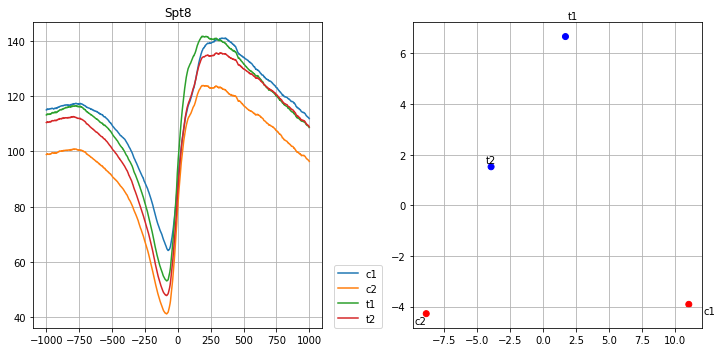

In [2]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt8/'

c1,c2,t1,t2 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt8_folder]
c1, c2, t1, t2 = [limado(i) for i in [c1,c2,t1,t2]]

spt8 = pd.concat([i.norm_counts for i in [c1,c2,t1,t2]], axis=1)
spt8.columns = ['c1','c2','t1','t2']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt8+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in ['c1','c2','t1','t2']]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt8')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

The first principal component accounts for 60% of the variance and is completely non-informative to us. Nevertheless, the second component (20%) seems to  have some small ammount of information, since the distance between groupd is a little, little bigger between groups copmared to within groups. Will try to work with the highly expressed genes.

explained variance ratios [0.59783446 0.26228323]
explained variance ratios [0.5685557  0.28039705]
explained variance ratios [0.54073135 0.29478589]
explained variance ratios [0.56192742 0.26212261]


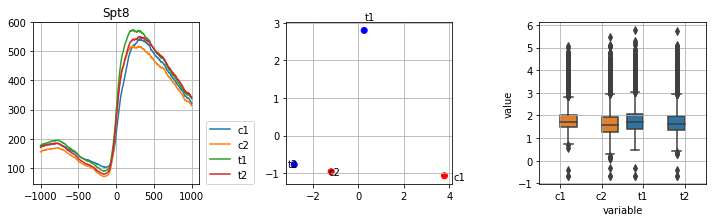

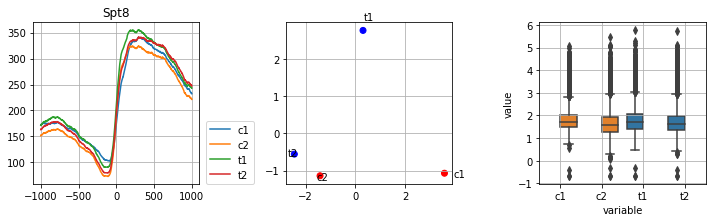

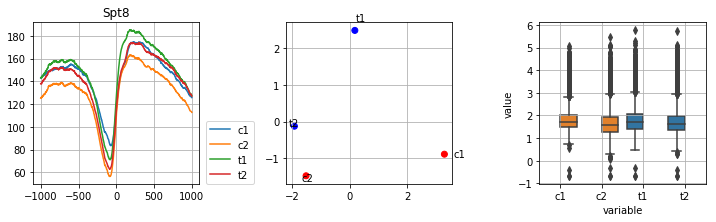

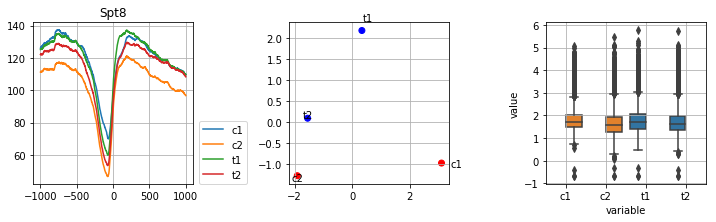

In [3]:
for start in [0,100,500,1000]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,3))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in ['c1','c2','t1','t2']]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt8')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

There will be no DEGs in this experiment

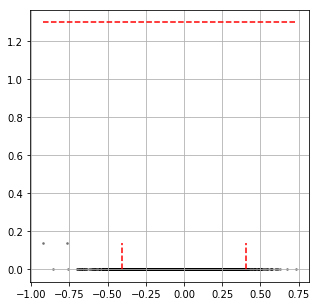

In [4]:
# Run limma from R

# Variable number of args in a list
args = ['Spt8_deg_pre_limma.csv', '2', '2', 'spt8_limma.csv']
spt8 = limma(args)

plt.figure(figsize=(5,5))
plt.grid()
volcano(spt8)

#### Spt8 degron experiments were very unsuccesful. We try with the other degron strains and with the double degrons  
<br>  
### Spt20 degron in YPD <a class="anchor" id="spt7"></a>

[0.50085694 0.28368608]


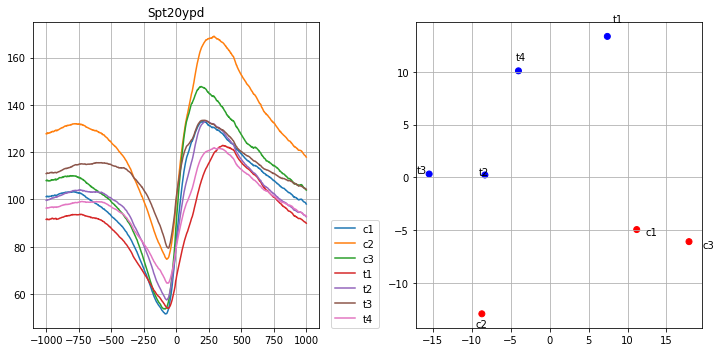

In [5]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt20/'

t1,c1,t2,c2,t3,t4,c3 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt20_ypd_folder]
c1, c2, c3, t1, t2, t3, t4 = [limado(i) for i in [c1,c2,c3,t1,t2,t3,t4]]

spt20ypd = pd.concat([i.norm_counts for i in [c1,c2,c3,t1,t2,t3,t4]], axis=1)
spt20ypd.columns = ['c1','c2','c3','t1','t2','t3','t4']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt20ypd+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in spt20ypd.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20ypd')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

This looks worse than spt8...

explained variance ratios [0.72209269 0.13699196]
explained variance ratios [0.69331478 0.16035664]
explained variance ratios [0.62948689 0.18986409]
explained variance ratios [0.54271381 0.22987288]


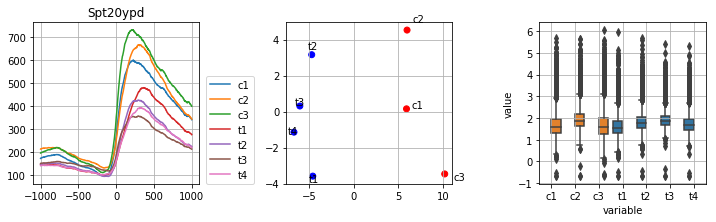

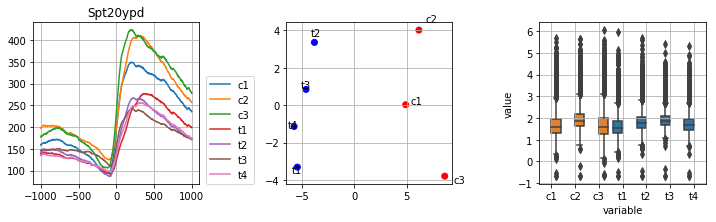

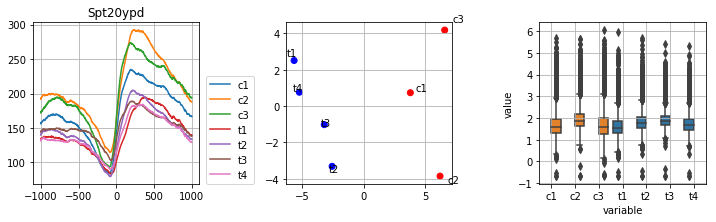

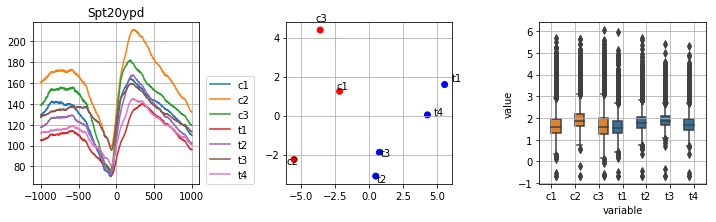

In [6]:
for start in [0,100,250,500]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,3))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in spt20ypd.columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20ypd')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

The first 750 genes seem to cluster very well in the first principal component, that accunts for ~70% of the variance.
limma to those genes.

324 positives and 142 negatives


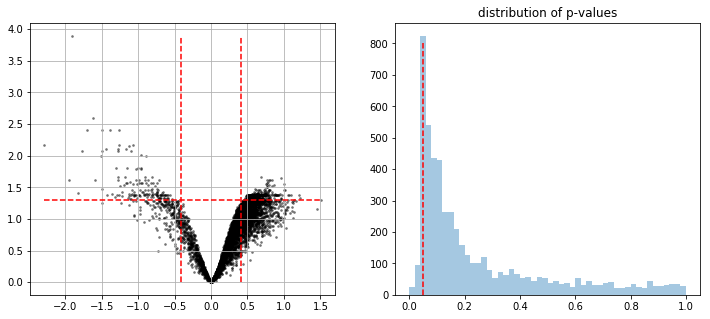

In [7]:
# Run limma from R
spt20ypd.to_csv('spt20ypd.csv')

# Variable number of args in a list
args = ['spt20ypd.csv', '3', '4', 'spt20ypd__limma.csv']
spt20ypd_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt20ypd_2)
print('{} positives and {} negatives'.format(len(positives(spt20ypd_2)), len(negatives(spt20ypd_2))))
plt.subplot(122)
plt.hist(spt20ypd_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');

The distribution of p-values looks good. Nevertheless, there are not enough small p-values, probably due to the intrinsic noise of this type of experiments.

### Spt20 degron in GC <a class="anchor" id="spt20gc"></a>

[0.52381379 0.31058512]


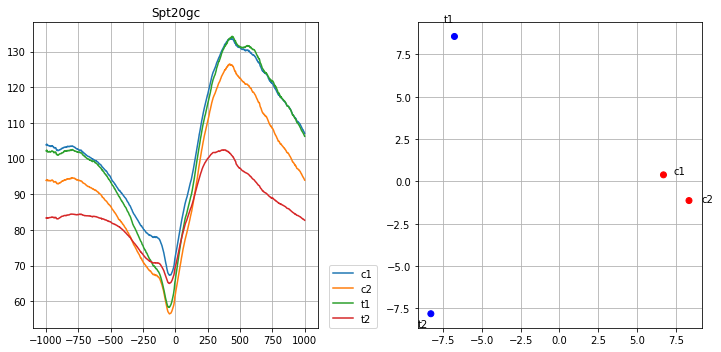

In [8]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt20/'

c1,t1,c2,t2 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt20_gc_folder]
c1,t1,c2,t2 = [limado(i) for i in [c1,t1,c2,t2]]

spt20gc = pd.concat([i.norm_counts for i in [c1,c2,t1,t2]], axis=1)
spt20gc.columns = ['c1','c2','t1','t2']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt20gc+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in spt20gc.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20gc')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

Good, at least 50% could be explained between control and treatment. Let's see if this improves using a small subset of most highly expressed genes.

explained variance ratios [0.73634649 0.22945003]
explained variance ratios [0.70452596 0.24531899]
explained variance ratios [0.52360717 0.36194273]
explained variance ratios [0.50484558 0.33546693]


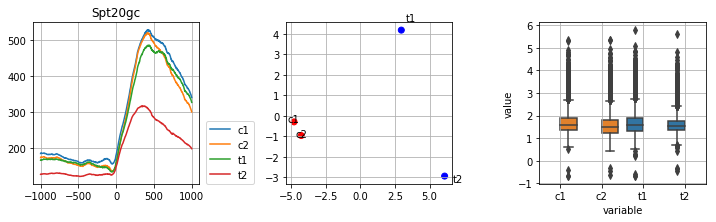

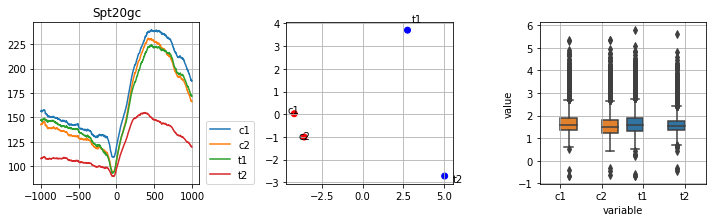

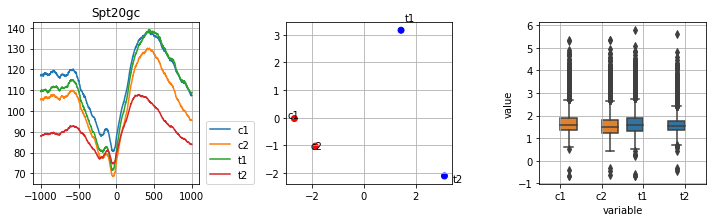

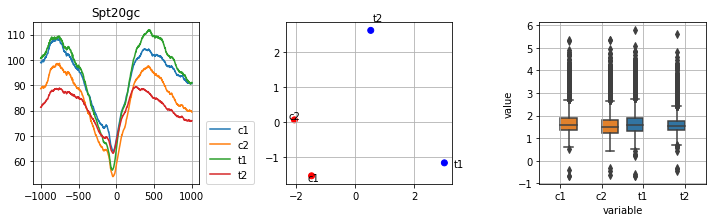

In [9]:
for start in [0,250,750,1500]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,3))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in spt20gc.columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20gc')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

90 positives and 209 negatives


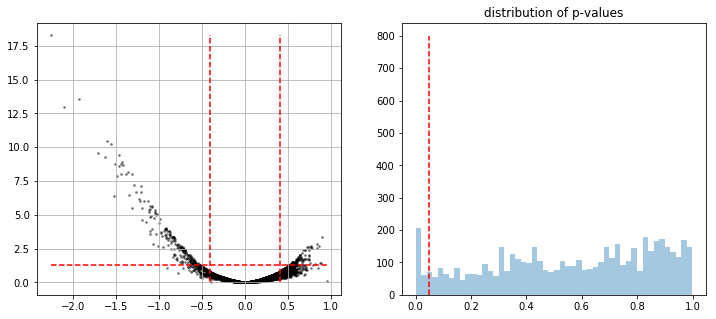

In [10]:
# Run limma from R
spt20gc.to_csv('spt20gc.csv')

# Variable number of args in a list
args = ['spt20gc.csv', '2', '2', 'spt20gc__limma.csv']
spt20gc_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt20gc_2)
print('{} positives and {} negatives'.format(len(positives(spt20gc_2)), len(negatives(spt20gc_2))))
plt.subplot(122)
plt.hist(spt20gc_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');

The distribution of p-values looks weird and probably one or two more of these experiments would give more robustness to any conclusion. 

<br>  
### Spt7_3 double degron <a class="anchor" id="spt7_3"></a>

[0.45145732 0.16798883]


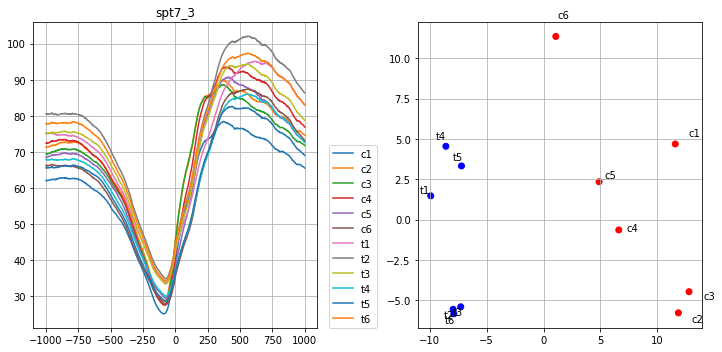

In [32]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt7_3/'

c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt7_3_folder]
c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [limado(i) for i in [c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6]]

spt7_3 = pd.concat([i.norm_counts for i in [c1,c2,c3,c4,c5,c6,t1,t2,t3,t4,t5,t6]], axis=1)
spt7_3.columns = ['c1','c2','c3','c4','c5','c6','t1','t2','t3','t4','t5','t6']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt7_3+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in spt7_3.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt7_3')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

I might try to exclude c6 or I might try to use a subset of genes...

explained variance ratios [0.76076049 0.12636325]
explained variance ratios [0.65500193 0.15462219]
explained variance ratios [0.48948644 0.16807238]
explained variance ratios [0.39994002 0.21665195]


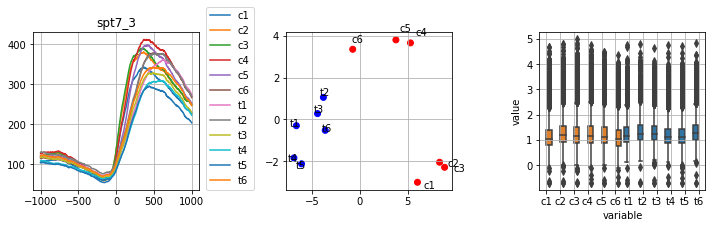

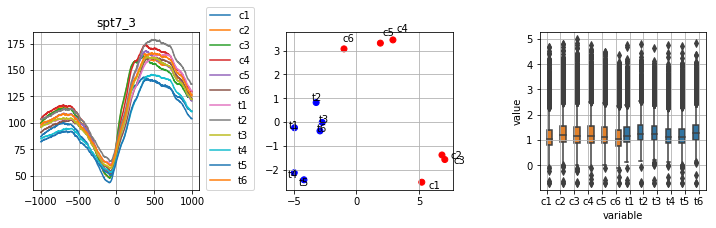

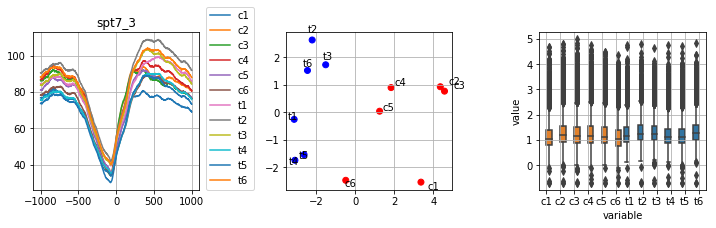

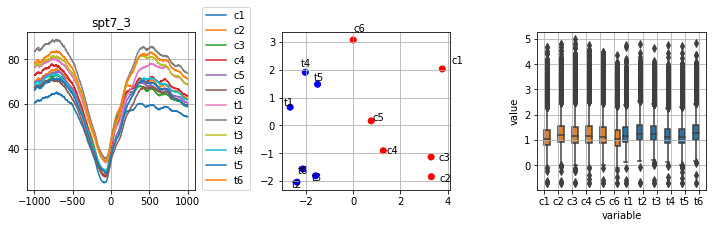

In [33]:
for start in [0,250,750,1500]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,3))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in spt7_3.columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt7_3')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c5','c6'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

explained variance ratios [0.79517016 0.11331205]
explained variance ratios [0.6973151  0.14414269]
explained variance ratios [0.53310862 0.16452895]
explained variance ratios [0.44539078 0.18988705]


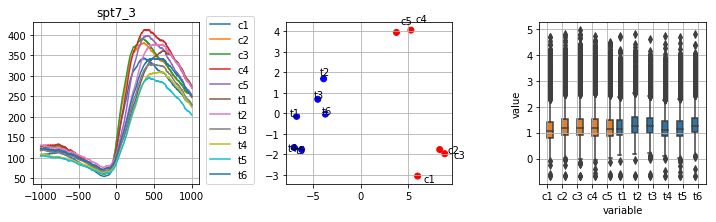

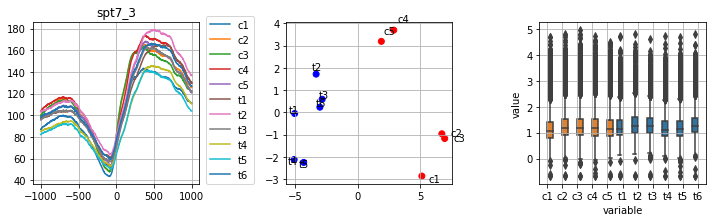

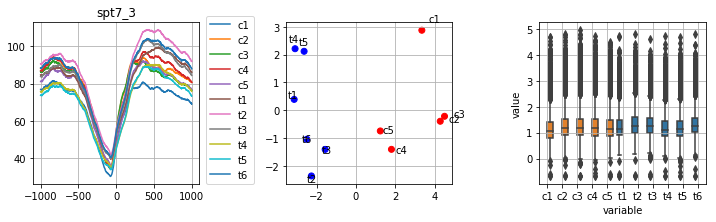

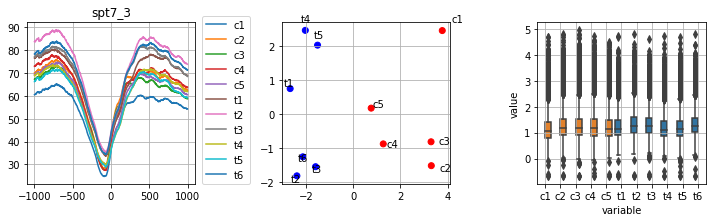

In [34]:
new_columns = list(spt7_3.columns.copy())
new_columns.remove('c6')

for start in [0,250,750,1500]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,3))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in new_columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt7_3')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.drop('c6',axis=1).loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp.drop('c6', axis=1))
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c5'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

Let's just check which genes show the highest difference between treatment and control taking their averaged log-counts. 

In [35]:
# s for summaries
sc = spt7_3[['c1','c2','c3','c4','c5','c6']].mean(axis=1)
st = spt7_3[['t1','t2','t3','t4','t5','t6']].mean(axis=1)
ssc = spt7_3[['c1','c2','c3','c4','c5','c6']].std(axis=1, ddof=1)
sst = spt7_3[['t1','t2','t3','t4','t5','t6']].std(axis=1, ddof=1)
s = pd.concat([sc,st,ssc,sst], axis=1)
s.columns = ['c','t','sc','st']

A = np.abs(s.t-s.c)
M = np.max([s.t,s.c])
idx = ((A/M)*100).sort_values()[::-1].index

explained variance ratios [0.88837772 0.05314341]


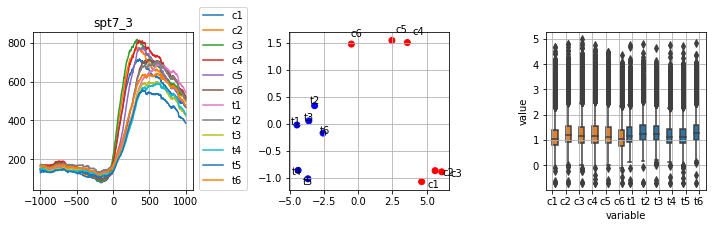

In [36]:
new_idx = idx[:100]

plt.figure(figsize=(10,3))

# plot profiles 
plt.subplot(131)
[eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in spt7_3.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt7_3')

# plot PCA
plt.subplot(132)
explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
plt.tight_layout()

# boxplot
plt.subplot(133)
tmp2 = pd.melt(tmp)
tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c5','c6'])
ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
ax.legend_.remove()
plt.grid()
print('explained variance ratios {}'.format(explained_ratio))

Unfortunately, I can't conclude anything about tis experiment... It's a mess...

1224 positives and 391 negatives


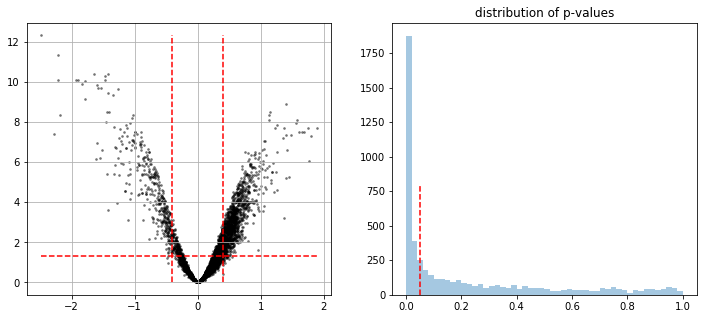

In [37]:
# Run limma from R
# take c6 out
spt7_3.drop('c6', axis=1).to_csv('spt7_3.csv')

# Variable number of args in a list
args = ['spt7_3.csv', '5', '6', 'spt7_3__limma.csv']
spt7_3_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt7_3_2)
print('{} positives and {} negatives'.format(len(positives(spt7_3_2)), len(negatives(spt7_3_2))))
plt.subplot(122)
plt.hist(spt7_3_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');

Ok.  

<br>  
### Spt8_3 double degron <a class="anchor" id="med8_3"></a>

[0.85035725 0.03972496]


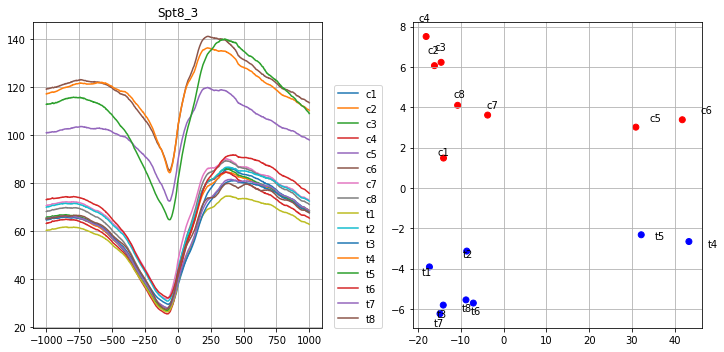

In [38]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt_8_3/'

c1,t1,t2,t3,c2,c3,c4,c5,t4,c6,t5,t6,t7,t8,c7,c8 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt8_3_folder]
c1,c2,c3,c4,c5,c6,c7,c8,t1,t2,t3,t4,t5,t6,t7,t8 = [limado(i) for i in [c1,c2,c3,c4,c5,c6,c7,c8,t1,t2,t3,t4,t5,t6,t7,t8]]
ctrols, tests = [c1,c2,c3,c4,c5,c6,c7,c8], [t1,t2,t3,t4,t5,t6,t7,t8]
columns = ['c1','c2','c3','c4','c5','c6','c7','c8','t1','t2','t3','t4','t5','t6','t7','t8']

spt8_3 = pd.concat([i.norm_counts for i in ctrols+tests], axis=1)
spt8_3.columns = columns

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt8_3+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt8_3')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

I already knew that c5,t4,c6,t5 were done in a separate date and I can avoid using this files (batch effect)

[0.28463126 0.20128397]


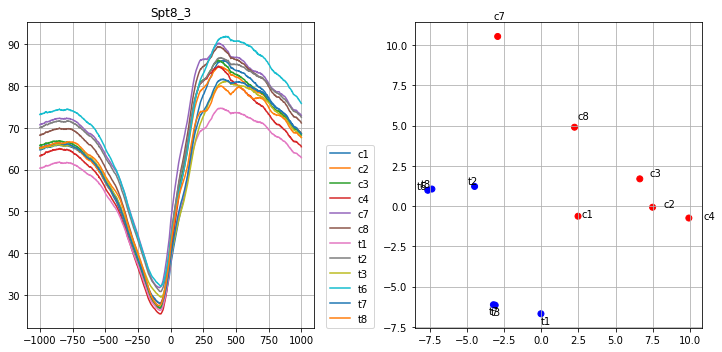

In [39]:
ctrols, tests = [c1,c2,c3,c4,c7,c8], [t1,t2,t3,t6,t7,t8]
columns = ['c1','c2','c3','c4','c7','c8','t1','t2','t3','t6','t7','t8']

spt8_3 = pd.concat([i.norm_counts for i in ctrols+tests], axis=1)
spt8_3.columns = columns

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt8_3+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt8_3')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

#### First: I should probably take c7 out... And what about the blue points in the bottom...?  
--> deleted this since I found that c7 is not an outlyier... [Here](#restricting_samples), without c7 and w/o c7 and the blue points in the bottom
#### Is there a difference if I only use the most highly expressed genes? <a class="anchor" id="spt8_3_titration"></a>

explained variance ratios [0.67483053 0.16921895]
explained variance ratios [0.55559631 0.22471976]
explained variance ratios [0.3374278  0.27771404]
explained variance ratios [0.33499628 0.18877657]


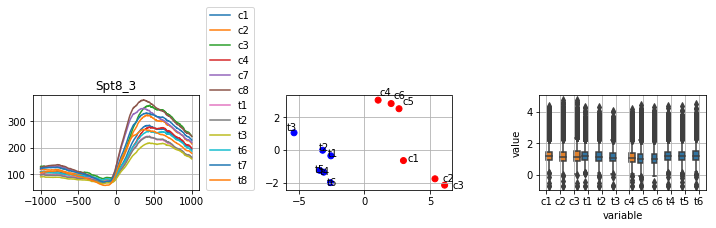

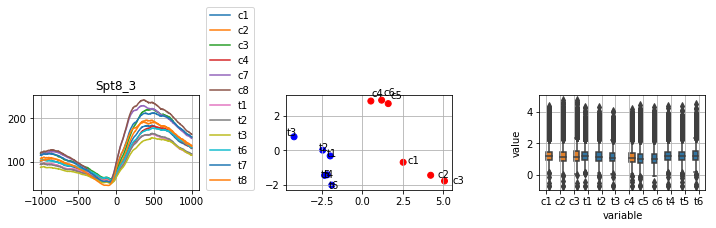

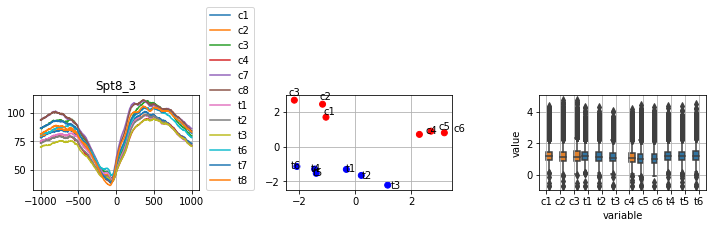

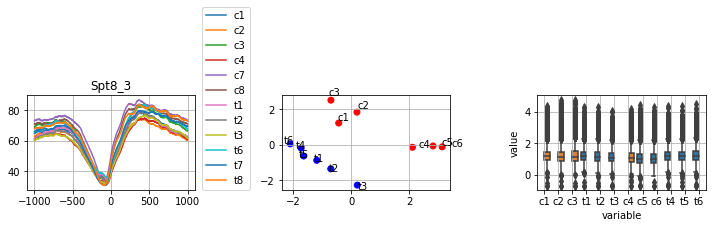

In [44]:
for start in [0,100,500,1000]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,2.5))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt8_3')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c7','c8'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

248 positives and 131 negatives


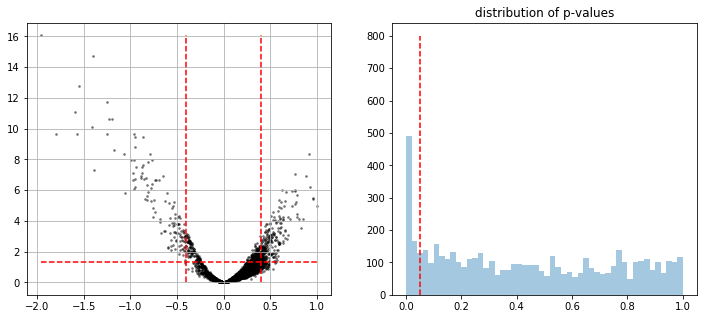

In [45]:
# Run limma from R
spt8_3.to_csv('spt8_3.csv')

# Variable number of args in a list
args = ['spt8_3.csv', '6', '6', 'spt8_3__limma.csv']
spt8_3_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt8_3_2)
print('{} positives and {} negatives'.format(len(positives(spt8_3_2)), len(negatives(spt8_3_2))))
plt.subplot(122)
plt.hist(spt8_3_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');

p-values distribution looks correct. We have a small subset of genes that are DE between treatment and control.

### Spt20_3 <a class="anchor" id="spst7_3"></a>

[0.32846511 0.20159729]


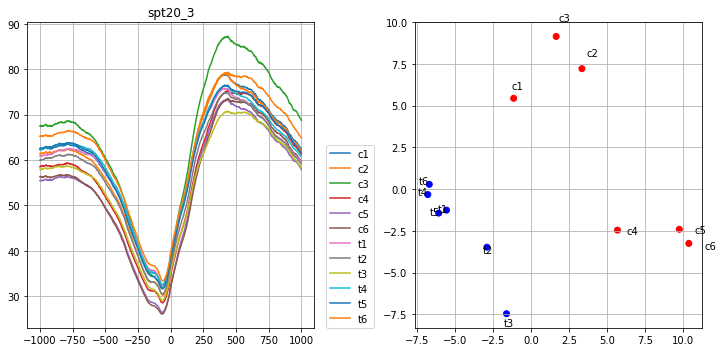

In [49]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt20_3/'

c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt20_3_folder]
c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [limado(i) for i in [c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6]]

spt20_3 = pd.concat([i.norm_counts for i in [c1,c2,c3,c4,c5,c6,t1,t2,t3,t4,t5,t6]], axis=1)
spt20_3.columns = ['c1','c2','c3','c4','c5','c6','t1','t2','t3','t4','t5','t6']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt20_3+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in spt20_3.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt20_3')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

explained variance ratios [0.54853769 0.24027488]
explained variance ratios [0.55156419 0.20489475]
explained variance ratios [0.58853756 0.12506791]
explained variance ratios [0.44717669 0.13338405]


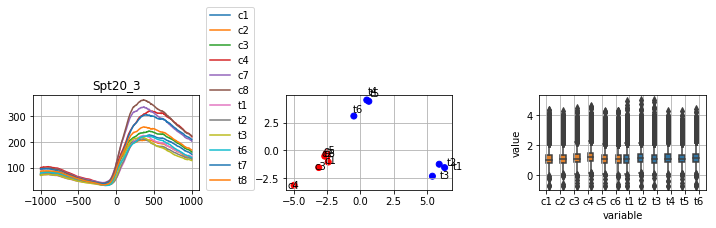

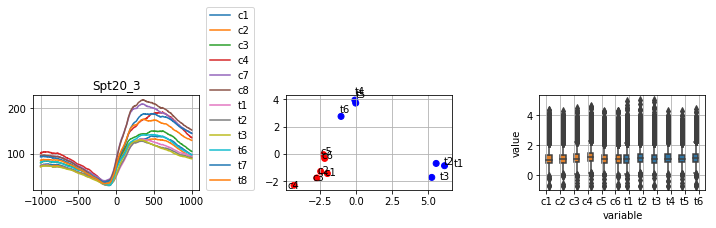

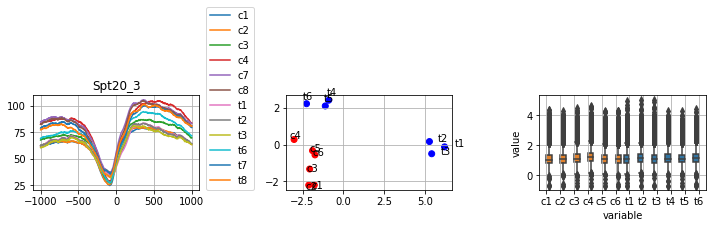

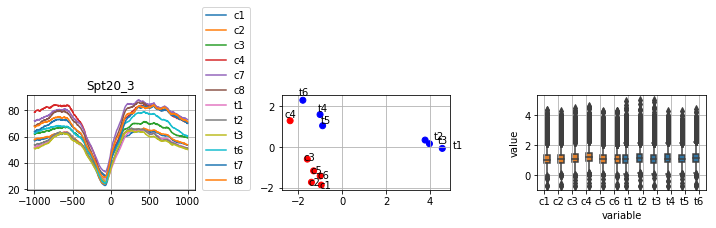

In [55]:
for start in [0,100,500,1000]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,2.5))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20_3')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c5','c6'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

187 positives and 171 negatives


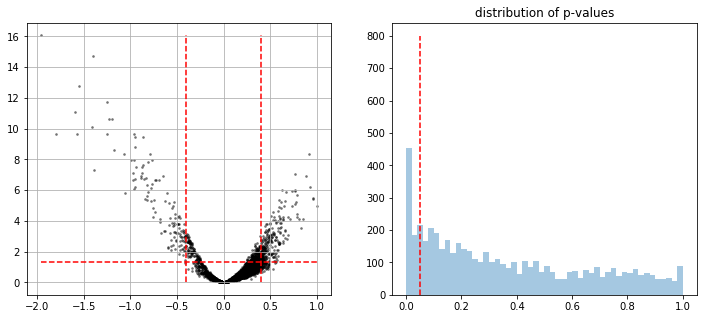

In [58]:
# Run limma from R
spt20_3.to_csv('spt20_3.csv')

# Variable number of args in a list
args = ['spt20_3.csv', '6', '6', 'spt20_3__limma.csv']
spt20_3_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt8_3_2)
print('{} positives and {} negatives'.format(len(positives(spt20_3_2)), len(negatives(spt20_3_2))))
plt.subplot(122)
plt.hist(spt20_3_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');



<br>  
### spt20_7 double degron <a class="anchor" id="spt20_7"></a>

[0.44196322 0.1277893 ]


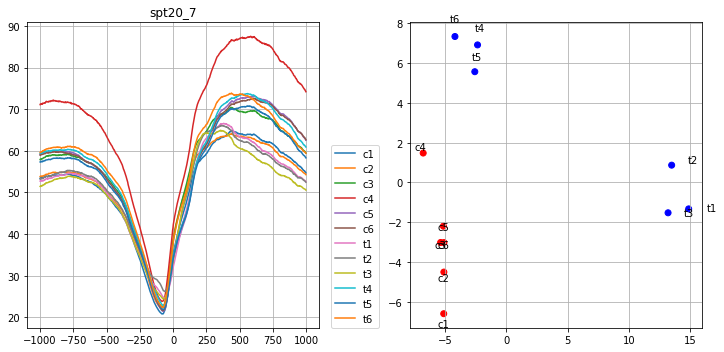

In [52]:
Path = '/fh/scratch/delete30/hahn_s/aerijman/SAGA/spt20_7/'

c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [[Path+j+i for i in os.listdir(Path+j) if re.search("Sc..mtgn$", i)][0] for j in spt20_7_folder]
c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6 = [limado(i) for i in [c1,c2,c3,t1,t2,t3,c4,c5,c6,t4,t5,t6]]

spt20_7 = pd.concat([i.norm_counts for i in [c1,c2,c3,c4,c5,c6,t1,t2,t3,t4,t5,t6]], axis=1)
spt20_7.columns = ['c1','c2','c3','c4','c5','c6','t1','t2','t3','t4','t5','t6']

# Transfom data to log to make it symetric and more normaly distributed
tmp = np.log(spt20_7+0.5)
tmp = tmp[np.isfinite(tmp)]
idx = tmp[[i for i in tmp.columns if i[0]=='c']].mean(axis=1).sort_values()[::-1].index

plt.figure(figsize=(10,5))

# plot profiles 
plt.subplot(121)
[eval(i).profile.plot(label=i) for i in spt20_7.columns]
plt.legend(loc=(1.04,0)); plt.grid(); plt.title('spt20_7')

#plot PCA
plt.subplot(122)
explained_ratio = doPCA(tmp, plot=True)
plt.tight_layout()

print(explained_ratio)

explained variance ratios [0.54853769 0.24027488]
explained variance ratios [0.55156419 0.20489475]
explained variance ratios [0.58853756 0.12506791]
explained variance ratios [0.44717669 0.13338405]


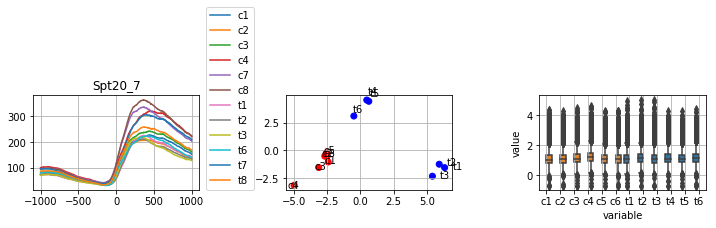

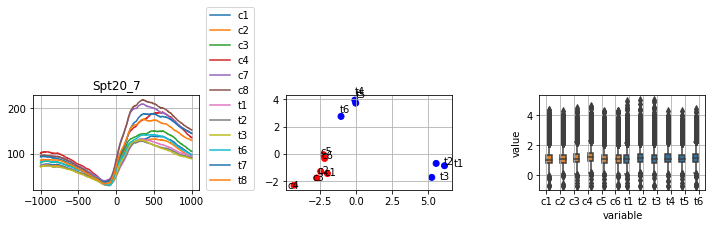

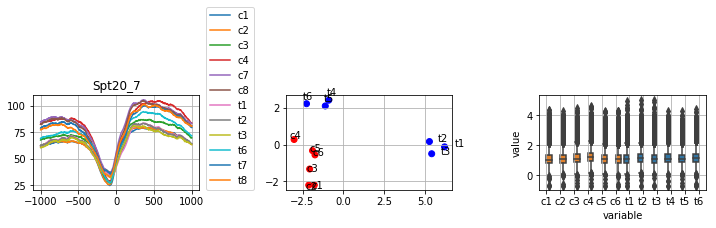

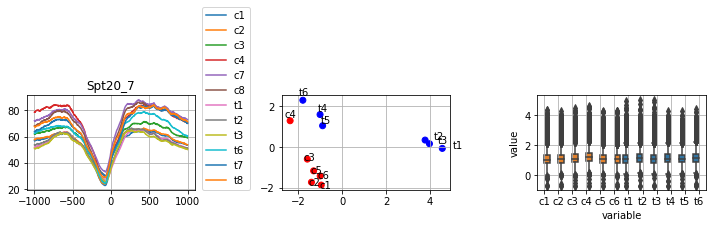

In [56]:
for start in [0,100,500,1000]:
    new_idx = idx[start:start+500]

    plt.figure(figsize=(10,2.5))

    # plot profiles 
    plt.subplot(131)
    [eval(i).df[new_idx].mean(axis=1).plot(label=i) for i in columns]
    plt.legend(loc=(1.04,0)); plt.grid(); plt.title('Spt20_7')

    # plot PCA
    plt.subplot(132)
    explained_ratio = doPCA(tmp.loc[new_idx], plot=True)
    plt.tight_layout()

    # boxplot
    plt.subplot(133)
    tmp2 = pd.melt(tmp)
    tmp2['CvsT'] = tmp2['variable'].isin(['c1','c2','c3','c4','c5','c6'])
    ax = sns.boxplot(x='variable', y='value', hue='CvsT', data=tmp2)
    ax.legend_.remove()
    plt.grid()
    print('explained variance ratios {}'.format(explained_ratio))

219 positives and 206 negatives


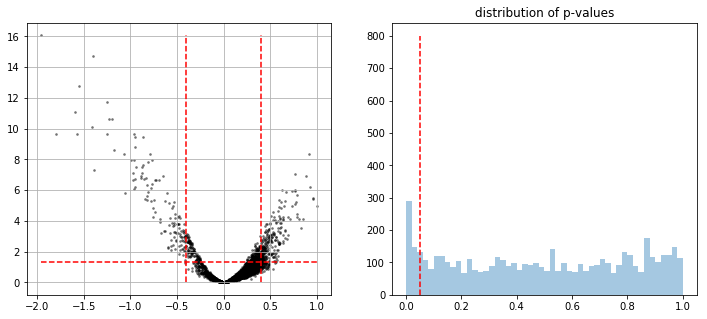

In [57]:
# Run limma from R
spt20_7.to_csv('spt20_7.csv')

# Variable number of args in a list
args = ['spt20_7.csv', '6', '6', 'spt20_7__limma.csv']
spt20_7_2 = limma(args)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.grid()
volcano(spt8_3_2)
print('{} positives and {} negatives'.format(len(positives(spt20_7_2)), len(negatives(spt20_7_2))))
plt.subplot(122)
plt.hist(spt20_7_2['adj.P.Val'], bins=50, alpha=0.4)
plt.plot([0.05,0.05],[0,800], ls="--", c='r')
plt.title('distribution of p-values');

## Preliminary conclusions:
* For some experiments I might test if varying the ammount of data, the results vary substantially. That would be our control over the number of reads that we need to measure nascent expression with confidence. I was taking 3x10$^6$ as default based on experience from people at the Henikoff lab and from googling, but we might need more than that.
* In many experiments we see how biological replicates are very different, to the point of having a mixture of controls and tests, which makes DEG analysis very difficult.
* I shoud check in each experiment what are the non-adjusted p-values and based on that we could infer that our results could have been obtained by chance.
* Compare if we see a fair correlation of expression between the different strains in dmso. With these controls as the standard for expression (in each strain), see if there is a correlation between the DE genes and levels of expression in dmso. Hopefully, in many strains there is no correlation and we could conclude that different subunits of SAGA are involved in the expression of different sets of genes. 

Old filters spt20_7
![image](../../figures/spt20_7_limma_volcano.jpg)